In [411]:
import pandas as pd

In [412]:
data = dict()
dataset_names = ['train', 'valid', 'test']

for dataset_name in dataset_names:
    df = pd.read_csv(f"data/{dataset_name}.csv")
    data.update({dataset_name: {'df': df}})

data.keys()

dict_keys(['train', 'valid', 'test'])

In [413]:
data['train'].keys()

dict_keys(['df'])

In [414]:
# data['train']['df'].head()
data['train']['df'].sample(5)

,ID,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
8573,10706,936,42,Huge,This is a gorgeous sweater but huge. and when ...,4,0,1,General Petite,Tops,Sweaters
8242,10303,1110,46,Simply beautiful,This is a beautiful dress and i would recommen...,4,1,0,General,Dresses,Dresses
2861,3575,1077,23,Cute dress,For reference i am wearing a medium in the pho...,4,1,0,General,Dresses,Dresses
11968,15000,1025,47,I'm in love,I'm 5'1 and 110 pounds and i ordered the 26 pe...,5,1,5,General,Bottoms,Jeans
9171,11477,868,36,NaN,NaN,3,1,0,General,Tops,Knits


In [415]:
data['train']['df'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18790 entries, 0 to 18789
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       18790 non-null  int64 
 1   Clothing ID              18790 non-null  int64 
 2   Age                      18790 non-null  int64 
 3   Title                    15773 non-null  object
 4   Review Text              18131 non-null  object
 5   Rating                   18790 non-null  int64 
 6   Recommended IND          18790 non-null  int64 
 7   Positive Feedback Count  18790 non-null  int64 
 8   Division Name            18781 non-null  object
 9   Department Name          18781 non-null  object
 10  Class Name               18781 non-null  object
dtypes: int64(6), object(5)
memory usage: 1.6+ MB


<AxesSubplot: >

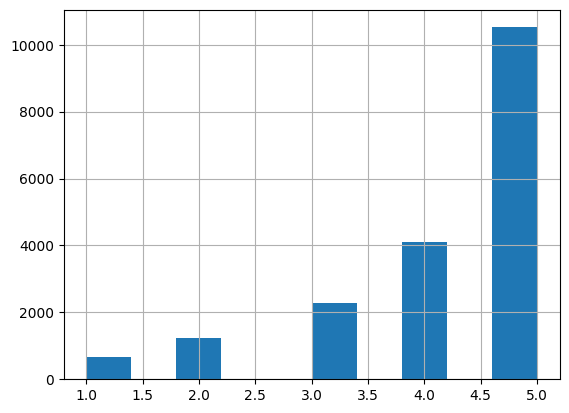

In [416]:
data['train']['df']['Rating'].hist()

In [417]:
data['train']['df']['Division Name'].fillna('').unique()

array(['Initmates', 'General', 'General Petite', ''], dtype=object)

In [418]:
data['train']['df']['Department Name'].fillna('').unique()


array(['Intimate', 'Dresses', 'Bottoms', 'Tops', 'Jackets', 'Trend', ''],
      dtype=object)

In [419]:
data['train']['df']['Class Name'].fillna('').unique()

array(['Intimates', 'Dresses', 'Pants', 'Blouses', 'Knits', 'Outerwear',
       'Lounge', 'Sweaters', 'Skirts', 'Sleep', 'Jackets', 'Swim',
       'Fine gauge', 'Trend', 'Jeans', 'Legwear', 'Shorts', 'Layering',
       'Casual bottoms', 'Chemises', ''], dtype=object)

In [420]:
['hi', 'there'].index('there')

1

In [421]:
def get_unique_values(df: pd.Series):
    return df.unique().tolist()

def preprocess_df(df: pd.DataFrame):
    df = df.copy(deep=True)

    division_name_unique_values = get_unique_values(df['Division Name'])
    df['Division Name Numeric'] = df['Division Name'].apply(division_name_unique_values.index)
    df.drop(['Division Name'], axis=1, inplace=True)

    department_name_unique_values = get_unique_values(df['Department Name'])
    df['Department Name Numeric'] = df['Department Name'].apply(department_name_unique_values.index)
    df.drop(['Department Name'], axis=1, inplace=True)

    class_name_unique_values = get_unique_values(df['Class Name'])
    df['Class Name Numeric'] = df['Class Name'].apply(class_name_unique_values.index)
    df.drop(['Class Name'], axis=1, inplace=True)

    return df

In [422]:
for dataset_name in data.keys():
    print(f"--- Preprocessing dataset {dataset_name}...")

    preprocessed_df = preprocess_df(data[dataset_name]['df'])
    data[dataset_name]['pp_df'] = preprocessed_df

--- Preprocessing dataset train...
--- Preprocessing dataset valid...
--- Preprocessing dataset test...


In [423]:
data['train']['pp_df'].sample(10)

,ID,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name Numeric,Department Name Numeric,Class Name Numeric
170,217,828,64,Too cute to pass up!,Adorable... too chilly now to wear alone & too...,5,1,3,1,3,3
4113,5188,909,70,Great fit and style,This is a great cardigan to wear buttoned or o...,5,1,1,2,3,12
18133,22644,886,46,Modern with retro flair,"Very cool top! i purchased this in the black, ...",5,1,1,2,3,4
16718,20892,1079,57,Dream dress,I bought this unique beauty in a size 0. the f...,5,1,1,1,1,1
7710,9647,828,39,Great fall top,This shirt is extremely soft and fits well. gr...,5,1,3,2,3,3
18169,22688,843,33,"Small in bust, tts in torso",This top is a tough one. i ordered my usual me...,3,1,23,1,3,3
3794,4768,1080,39,Beautiful!!,This dress is so easy to wear! the neck line i...,5,1,0,1,1,1
4591,5783,1078,39,A great addition to any wardrobe,I bought the dress in mango. i love the color....,4,1,0,1,1,1
16833,21031,1083,35,"Gorgeous dress, recommend for slimmer individuals",I love this dress! my bra straps do not show i...,4,1,2,2,1,1
6549,8211,868,49,Cute and fits well but a littel see through,I got this top in white and really like it. it...,5,1,0,1,3,4
